# Live Coding: GA Bagian 5



## Contoh 2
$\max f(x_1,x_2,x_3) = 4x_1 -x_1^2 + 3x_2 -x_2^2 +5x_3 -3x_3^2$

$3x_1 + 2x_2 +3x_3 \le 10$

$x_1 + 4x_2 + x_3 \le20$

$x_1 \ge 0, x_2 \ge 0, x_3 \ge 0$

In [18]:
using DataFrames
# Inisialisasi
ukuranPopulasi=100
jumlah_generasi=100;
populasi=DataFrame(ones(ukuranPopulasi,4));# kolom pertama sampai 3 untuk gen. Kolom keempat untuk fitness value

function fitness(x)
    # x adalah individu
    hasil=4*x[1]-x[1]^2 + 3*x[2]-x[2]^2 +5*x[3]-3*x[3]^2
    return hasil
end

function hitungFitness(populasi)
    populasi[:,4]=[fitness(i) for i in eachrow(populasi)]
    return populasi
end


function acakGen(populasi)
    populasi=DataFrame(rand(range(0,stop=100,step=0.01),size(populasi)))
    # rand(range(-100,stop=100,step=0.000001),size(first(populasi)))
    hitungFitness(populasi)
    return populasi
end
function mutasi(populasi,mutation_rate=0.1)
        jumlahMutasi=round(size(populasi)[1]*mutation_rate)
        #print("jumlah mutasi ",jumlahMutasi," ")
        himpunan=range(-1,stop=1,step=0.001)
        for i in range(1,stop=jumlahMutasi)
           push!(populasi,rand(range(0,stop=100,step=0.01),size(first(populasi))))            
        end
        populasi=hitungFitness(populasi)
    return populasi
end 

findCandidates (generic function with 1 method)

In [19]:
populasi=acakGen(populasi);
# Loop GA
populasi=hitungFitness(populasi)
terbaik=DataFrame(first(populasi))
for i in range(1,stop=jumlah_generasi,step=1)
    #print("\nGenerasi ke ")
    #print(i)
    #print(" ")
    
    # 1. Evaluasi Individu
    # print("\n\n Hitung Fitness\n")
    populasi=hitungFitness(populasi)
    # print("\n\nUrutkan\n")
    # 2. Mutasi
    mutasi(populasi,0.75)
    # 3. Cross over
    # Selection
    populasi=hitungFitness(populasi)
    sort!(populasi,4,rev=true) # column 4 is where fitness values are stored.
    populasi=first(populasi,ukuranPopulasi)
    t=first(populasi)# untuk minimalisasi gunakan first
    push!(terbaik,t)
end

using Plots



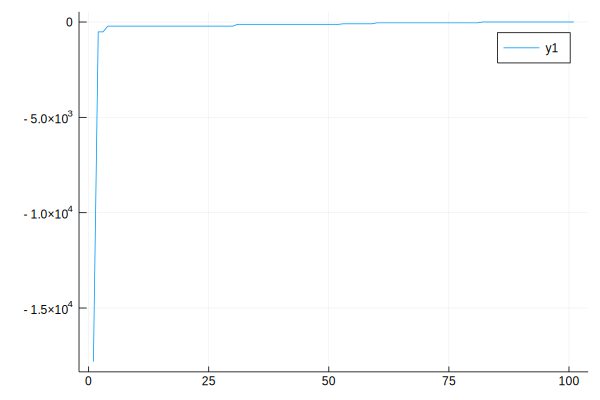

In [20]:
plot(terbaik.x4)
#acakGen(terbaik)


Cara memeriksa kendala $3x_1 + 2x_2 + 3x_3 <=10$


$x_1 + 4x_2 + x_3 \le20$

In [21]:
dataacak=rand(range(0,stop=10,step=0.01),(100000,4))
df=DataFrame(ones(1,4)) # tempat menyimpan data feasible
sample=[ push!(df,i) for i in eachrow(dataacak) if (3*i[1]+2*i[2]+3*i[3]<=10) & (i[1] + 4*i[2] + i[3] <=20)];
hitungFitness(df)
sort!(df,4,rev=true)
function findCandidates(n_candidate)
        dataacak=rand(range(0,stop=10,step=0.01),(1000*n_candidate,4))
        df=DataFrame(ones(1,4)) # tempat menyimpan data feasible
        sample=[ push!(df,i) for i in eachrow(dataacak) if (3*i[1]+2*i[2]+3*i[3]<=10) 
                            & (i[1] + 4*i[2] + i[3] <=20) & (i[1] >=0 & (i[2]>=0 & (i[3]>=0)))];
        deleterows!(df,1) # the first row are ones.
        return first(df,n_candidate)
end                

findCandidates (generic function with 1 method)

In [22]:
findCandidates(10)

,x1,x2,x3,x4
,Float64,Float64,Float64,Float64
1,0.55,2.03,1.31,8.32
2,0.21,2.71,0.55,1.12
3,0.96,1.09,0.71,8.52
4,1.6,0.4,1.44,7.82
5,0.53,0.02,1.89,6.64
6,0.01,1.48,0.0,7.78
7,0.51,2.64,0.44,8.42
8,0.09,0.15,1.49,3.32
9,0.62,1.12,1.02,6.97


In [23]:
sort!(hitungFitness(findCandidates(100000)),4,rev=true)

,x1,x2,x3,x4
,Float64,Float64,Float64,Float64
1,1.73,1.28,0.75,8.1912
2,1.79,1.28,0.69,8.1792
3,1.72,1.32,0.71,8.1769
4,1.64,1.39,0.76,8.1755
5,1.74,1.33,0.69,8.1752
6,1.79,1.21,0.73,8.1731
7,1.7,1.32,0.72,8.1724
8,1.67,1.31,0.76,8.1722
9,1.67,1.27,0.8,8.1682
